In [1]:
import pandas as pd
import numpy as np
import pickle

## Initial Inspection

In [2]:
df = pd.read_csv('../../Data/cr_preproc_data_mturk.csv')
df

,rt,time_elapsed,subject_ID,item,lag,category,confidence,correct,correct_num,category_label,...,position,old,yes,block_type,prev_cat,prev_cat_match,prev_cat_label,prev_cat_label_match,curr_cat_length,curr_cat_label_length
0,1640.345,71781.0,120,ARM,0,Uncategorized,1.0,True,1,BodyParts,...,0,False,False,Uncategorized,NaN,NaN,NaN,False,NaN,0
1,845.750,71783.0,422,CELLO,0,Uncategorized,5.0,False,0,Instruments,...,0,False,True,Uncategorized,NaN,NaN,NaN,False,NaN,0
2,NaN,72233.0,52,HALLWAY,0,Building,NaN,False,0,Building,...,0,False,NaN,Categorized,NaN,False,NaN,False,0.0,0
3,NaN,72813.0,20,MOUNTAIN,0,Uncategorized,NaN,False,0,Landscapes,...,0,False,NaN,Uncategorized,NaN,NaN,NaN,False,NaN,0
4,NaN,73029.0,108,ROBIN,0,Uncategorized,NaN,False,0,Birds,...,0,False,NaN,Uncategorized,NaN,NaN,NaN,False,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381055,NaN,12140412.0,228,CARROT,163,Vegetables,NaN,False,0,Vegetables,...,575,True,NaN,Categorized,Landscapes,False,Landscapes,False,20.0,20
381056,NaN,12144498.0,228,GOOSE,112,Uncategorized,NaN,False,0,Birds,...,576,True,NaN,Uncategorized,Vegetables,NaN,Vegetables,False,NaN,21
381057,NaN,12148572.0,228,PEAS,68,Vegetables,NaN,False,0,Vegetables,...,577,True,NaN,Categorized,Uncategorized,False,Birds,False,21.0,21
381058,NaN,12152653.0,228,SAW,159,Tools,NaN,False,0,Tools,...,578,True,NaN,Categorized,Vegetables,False,Vegetables,False,22.0,22


In [3]:
df = df.drop(['time_elapsed', 'correct', 'correct_num', 'block_type', 'item_name', 'prev_cat', 'prev_cat_match', 'prev_cat_label', 'prev_cat_label_match'], axis=1)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length
0,1640.345,120,ARM,0,Uncategorized,1.0,BodyParts,0,False,False,NaN,0
1,845.750,422,CELLO,0,Uncategorized,5.0,Instruments,0,False,True,NaN,0
2,NaN,52,HALLWAY,0,Building,NaN,Building,0,False,NaN,0.0,0
3,NaN,20,MOUNTAIN,0,Uncategorized,NaN,Landscapes,0,False,NaN,NaN,0
4,NaN,108,ROBIN,0,Uncategorized,NaN,Birds,0,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381055,NaN,228,CARROT,163,Vegetables,NaN,Vegetables,575,True,NaN,20.0,20
381056,NaN,228,GOOSE,112,Uncategorized,NaN,Birds,576,True,NaN,NaN,21
381057,NaN,228,PEAS,68,Vegetables,NaN,Vegetables,577,True,NaN,21.0,21
381058,NaN,228,SAW,159,Tools,NaN,Tools,578,True,NaN,22.0,22


## Discard subjects with no-resp > 250

In [4]:
subjlist = df.subject_ID.to_numpy()
subjlist = np.unique(subjlist)
discard = []
for subj in subjlist:
    df_subj = df.loc[df.subject_ID == subj]
    no_ans = np.isnan(df_subj.yes.to_numpy().astype('float'))
    num_no_ans = np.sum(no_ans)
    if num_no_ans > 250:
        discard.append(subj)

discard.append(200) # additional, see David
len(discard)

109

In [5]:
df_cl = df.loc[df.subject_ID.isin(discard) == False]
df_cl = df_cl.sort_values(by=['subject_ID','position'])
df_cl = df_cl.astype({'yes': 'float'})
df_cl

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0.0,NaN,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0.0,NaN,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0.0,NaN,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0.0,NaN,1
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0.0,18.0,18
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1.0,23.0,23
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1.0,19.0,19
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0.0,NaN,23


## AUC Screening

In [6]:
df_hr = df_cl.groupby(['subject_ID','old']).yes.mean().reset_index()
df_hr = pd.pivot_table(df_hr, values='yes', index=['subject_ID'],
                    columns=['old']).reset_index()
df_hr

old,subject_ID,False,True
0,0,0.232323,0.974820
1,1,0.150000,0.821429
2,2,0.187919,0.731884
3,3,0.080808,0.835714
4,5,0.130435,0.803571
...,...,...,...
543,652,0.502304,0.502646
544,653,0.353333,0.928571
545,654,0.117057,0.964286
546,655,0.053004,0.396296


In [7]:
def AUC(x):
    r = np.trapz([0,x[True],1], x = [0,x[False],1])
    return r
df_hr['AUC'] = df_hr.apply(AUC, axis = 1)
df_hr

old,subject_ID,False,True,AUC
0,0,0.232323,0.974820,0.871248
1,1,0.150000,0.821429,0.835714
2,2,0.187919,0.731884,0.771982
3,3,0.080808,0.835714,0.877453
4,5,0.130435,0.803571,0.836568
...,...,...,...,...
543,652,0.502304,0.502646,0.500171
544,653,0.353333,0.928571,0.787619
545,654,0.117057,0.964286,0.923614
546,655,0.053004,0.396296,0.671646


array([[<Axes: title={'center': 'AUC'}>]], dtype=object)

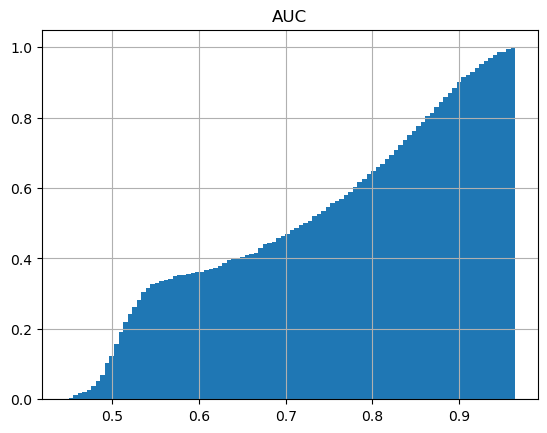

In [8]:
df_hr.hist("AUC",bins=100, density=True, cumulative=True)

array([[<Axes: title={'center': 'AUC'}>]], dtype=object)

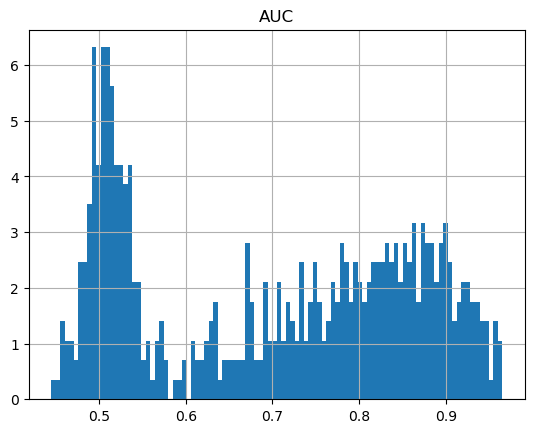

In [9]:
df_hr.hist("AUC",bins=100, density=True, cumulative=False)

In [10]:
bad_subj = df_hr['subject_ID'][df_hr['AUC'] < 0.6].to_list()
len(bad_subj)

197

In [11]:
df_cl = df_cl.loc[~df_cl.subject_ID.isin(bad_subj)]
df_cl

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0.0,NaN,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0.0,NaN,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0.0,NaN,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0.0,NaN,1
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0.0,18.0,18
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1.0,23.0,23
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1.0,19.0,19
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0.0,NaN,23


## YES dtype

In [12]:
# df_cl = df_cl.loc[np.logical_not(np.isnan(df_cl.yes))].reset_index()
df_cl = df_cl.astype({'yes': 'Int32'})
df_cl

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23


## Add columns

In [13]:
items = np.unique(df_cl.item)
item2no = {}
for i in range(len(items)):
    item2no[items[i]] = i+1
df_cl['itemno'] = df_cl.apply(lambda x: item2no[x.loc['item']], 1)
df_cl

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213


In [14]:
subjlist_cl = df_cl.subject_ID
subjlist_cl = np.unique(subjlist_cl)
len(subjlist_cl)

351

In [15]:
df_cl['session'] = df_cl.apply(lambda x: np.flatnonzero(np.asarray(subjlist_cl == x.loc['subject_ID'])).item(), 1)
df_cl = df_cl.reset_index(drop=True)
df_cl

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
0,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
1,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
2,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
3,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
4,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203575,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,350
203576,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,350
203577,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,350
203578,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,350


In [17]:
# save
with open('../../Data/simu1_behav.pkl', 'wb') as outp:
    pickle.dump(df_cl, outp, pickle.HIGHEST_PROTOCOL)